In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


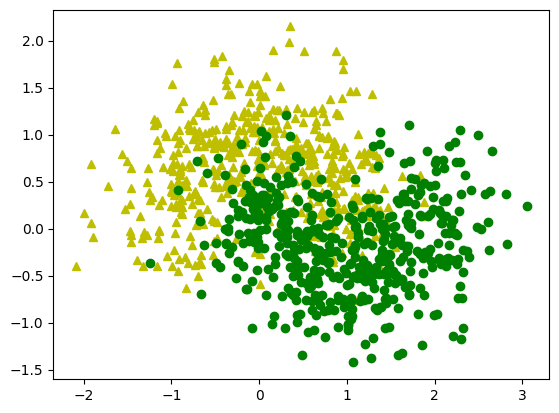

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.4)
plt.plot(X[:, 0][y==0],X[:, 1][y==0], "y^")
plt.plot(X[:, 0][y==1],X[:, 1][y==1], "go")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree_clf = DecisionTreeClassifier()
param_grid = {
    "max_depth": [i for i in range(4, 10)],
    "max_leaf_nodes": [i for i in range(4, 20)],
    "criterion": ["gini", "entropy"]
}
gs_tree = GridSearchCV(tree_clf, param_grid, cv=10)
gs_tree.fit(X_train, y_train)
gs_tree.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 12}

In [ ]:
best_tree = gs_tree.best_estimator_

In [ ]:
best_params = gs_tree.best_params_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = best_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.865

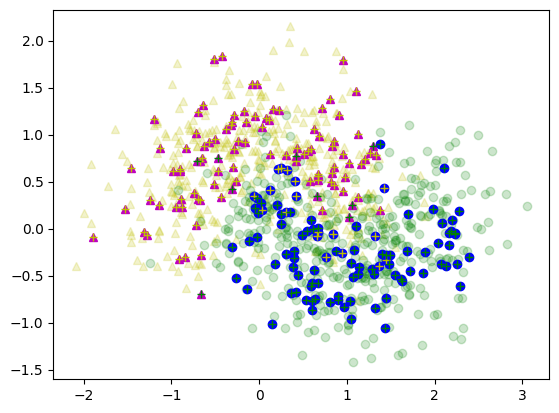

In [ ]:
plt.plot(X_train[:, 0][y_train==0],X_train[:, 1][y_train==0], "y^", alpha=0.2)
plt.plot(X_train[:, 0][y_train==1],X_train[:, 1][y_train==1], "go", alpha=0.2)
plt.plot(X_test[:, 0][y_pred==0],X_test[:, 1][y_pred==0], "m^")
plt.plot(X_test[:, 0][y_pred==1],X_test[:, 1][y_pred==1], "bo")
plt.plot(X_test[:, 0][y_test==0],X_test[:, 1][y_test==0], "y+")
plt.plot(X_test[:, 0][y_test==1],X_test[:, 1][y_test==1], "g+")

In [ ]:
import numpy as np
from sklearn.model_selection import ShuffleSplit
n_trees = 1000
rs = ShuffleSplit(n_splits=n_trees, train_size= 600, random_state=0)

train_scores = []
test_scores = []
mini_sets = []

print(f"get_n_splits: {rs.get_n_splits(X_train, y_train)}")
for i, (train_index, test_index) in enumerate(rs.split(X_train, y_train)):
    mini_sets.append((X_train[train_index], y_train[train_index]))

    # _tree_clf = DecisionTreeClassifier(**best_params)
    # _tree_clf.fit(X_train[train_index], y_train[train_index])
    # forest.append(_tree_clf)
    # train_scores.append(accuracy_score(_tree_clf.predict(X_train[test_index]), y_train[test_index]))
    # test_scores.append(accuracy_score(_tree_clf.predict(X_test), y_test))

#np.average(train_scores), np.average(test_scores)
mini_sets[0][0]

get_n_splits: 1000


array([[ 2.31017299, -0.73993635],
       [ 0.77874465, -0.36589991],
       [-0.13126804,  1.14403452],
       ...,
       [ 0.90769203, -0.5215447 ],
       [ 1.06187742, -0.85684647],
       [-0.34655673, -0.26011841]])

In [ ]:
forest = [DecisionTreeClassifier(**best_params) for _ in range(n_trees)]


In [ ]:
import scipy

preds = np.ndarray(shape=(len(forest),len(y_test)), dtype=float, order='F')
for i, (_tree, (X_train, y_train)) in enumerate(zip(forest,mini_sets)):
  _tree.fit(X_train, y_train)
  preds[i] = _tree.predict(X_test)

y_forest_pred = scipy.stats.mode(preds, axis=0, nan_policy='propagate', keepdims=False).mode
accuracy_score(y_test, y_forest_pred)

0.875